# 参考サイト

* [Home - Keras Documentation](https://keras.io/ja/)
* [kerasのmnistのサンプルを読んでみる - Qiita](https://qiita.com/ash8h/items/29e24fc617b832fba136)

# チュートリアルからの変更点

* モデルの可視化ライブラリの都合でtensorflow付属のkerasから通常のkerasに変更

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

1. 結果が可視化しやすいので隠れ層なし（入力層と全結合層だけ）のモデルに変更
2.今は精度が落ちてくれた方が都合がいいのでDropoutも無し


In [11]:
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(512, activation="relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## モデルの可視化

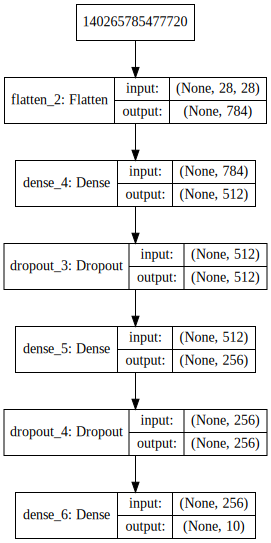

In [12]:
# PNG形式でモデルの構造を出力する
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

# SVG形式でモデルの構造を出力する
# 環境によっては''''pip install pydot''を実行し、pydotをインストールする必要あり
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## 学習の進み具合のグラフ化

In [13]:
!pip install livelossplot

In [14]:
from livelossplot import PlotLossesKeras

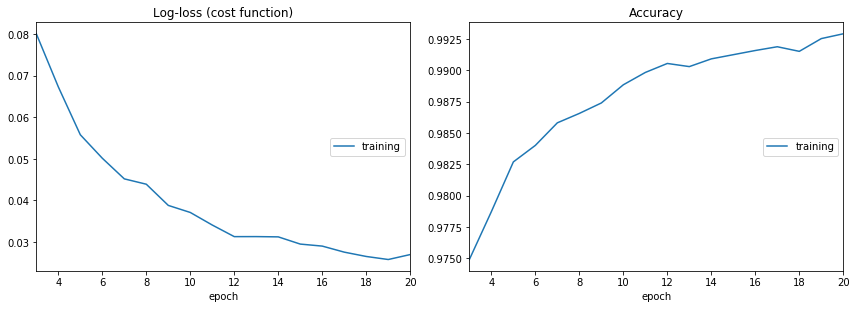

Log-loss (cost function):
training   (min:    0.026, max:    0.219, cur:    0.027)

Accuracy:
training   (min:    0.934, max:    0.993, cur:    0.993)


In [15]:
epochs = 20
stack = model.fit(x_train, y_train, epochs=epochs, callbacks=[PlotLossesKeras()])

## AccuracyとLossのグラフ

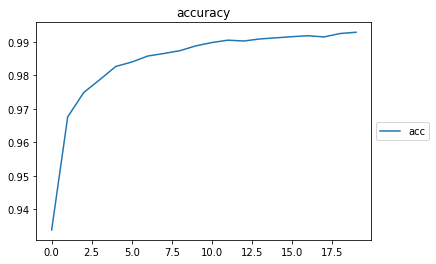

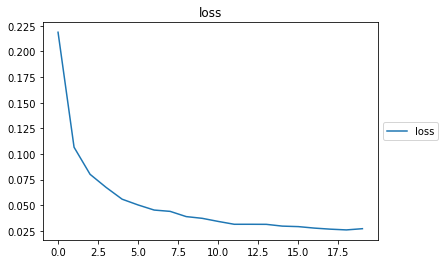

In [16]:
import matplotlib.pyplot as plt

x = range(epochs)
plt.plot(x, stack.history['acc'], label="acc")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, stack.history['loss'], label="loss")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## テストデータで精度確認

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 31us/step


[0.08427141407701165, 0.9832]

# 学習した成果の保存

In [18]:
import os.path

f_model = './model'
if not os.path.exists(f_model):
    os.mkdir(f_model)

json_string = model.to_json()
open(os.path.join(f_model,'tf_keras_mnist_beginner_weights.json'), 'w').write(json_string)

yaml_string = model.to_yaml()
open(os.path.join(f_model,'tf_keras_mnist_beginner_weights.yaml'), 'w').write(yaml_string)

print('save model')
model.save(os.path.join(f_model,'tf_keras_mnist_expert.h5'))

save model
